# 02 Randomized Experiment

We need randomization to assign subjects to the treatment group or the control group. Assume there are $N$ subjects.

Recall the assumption of exchangeability in the first course:

$$\mathbb P(A = 1|C = c) = \mathbb P(A = 0|C = c) = \frac12.$$

That is, for each counfounding variable, we shall assign $A\in\{0,1\}$ with equal probability.


## Randomization 

### Bernoulli Randomization

For each subject, assign it to the control group or the treatment group with equal probability. There are $2^N$ different possible assignments.

However, there is a probability that the size of the control group and the treatment group is unbalanced when $N$ is not large enough.

### Complete Randomization

First determine the size of the treatment group, $N_0$. Then randomly pick $N_0$ subjects to the treatment group. There are $\binom{N}{N_0}$ different combinations.

This guarantees the treatment and control group size.

### Stratified Randomization

As there are confounding factors that will impact our study, we can firstly group the subjects into clusters so that in each cluster the subjects do not differ much. And then in each cluster we perform randomized assignment.

This is called stratified randomization.

### Paired Randomization

First pair the $N$ subjects into $N/2$ pairs where each pair of subjects are similar. Then randomly pick one subject to the treatment group from each pair. For example, we can apply this method when conducting studies on twins. 

Paired randomization is a special case of stratified randomization.

## Fisher's Sharp Null Hypothesis

Assume we want to know whether a new treatment has effect, we can compare the outcome $Y^1$ with $Y^0$.

Mathmatically, we can propose the following hypothesis testing:

$${\rm H_0}:\ Y^1(\omega) = Y^0(\omega) \quad\quad\forall\omega\in\Omega$$

This is the Fisher's sharp null hypothesis. It requires identity for all individuals.

### Randomization Distribution

Assuming the sharp null hypothesis $H_0$ holds and we have test subjects $w_1,\dotsc,w_n$. Then for each $w_i$, its outcome $Y_i^a$ is fixed no matter it is in the treatment or in the control group. Hence, as long as we observe $Y_1^{A_1},\dotsc,Y_n^{A_n}$ by experiment, we also know that $Y_i^{1-A_i} = Y_i^{A_i} = Y_i$ even though it cannot be observed.

Now we check the metric SACE, 

$$\widehat{\rm SACE} = \frac{1}{n_1}\sum_{A_i=1}Y_i -  \frac{1}{n_0}\sum_{A_i=0}Y_i.$$

Since $Y_i$ is fixed for each $i$. If we <font color=red>randomize the assignment</font> of $A_1,\dotsc,A_n$, the estimated SACE is a random variable.

### Permutation Test

When assuming $H_0$, the absolute value of SACE would be close to zero. When $H_0$ is not true, the observed absolute value of SACE would be extreme.

We reject $H_0$ with confidence $(100\alpha)\%$ when the observed quantile is greater than $1 - \alpha$.

This is the permutation test (taught in the statistics course).

In [6]:
# Example: we want to know whether drinking diet cola increases calcium excretion with sharp null hypothesis

import pandas as pd
data = pd.DataFrame({'Drink': ['Diet Cola'] * 8 + ['Water'] * 8,
    'Calcium Excreted': [50,62,48,55,58,61,58,56,48,46,54,45,53,46,53,48]})
data

,Drink,Calcium Excreted
0,Diet Cola,50
1,Diet Cola,62
2,Diet Cola,48
3,Diet Cola,55
4,Diet Cola,58
5,Diet Cola,61
6,Diet Cola,58
7,Diet Cola,56
8,Water,48
9,Water,46


p-value = 0.005283605283605284


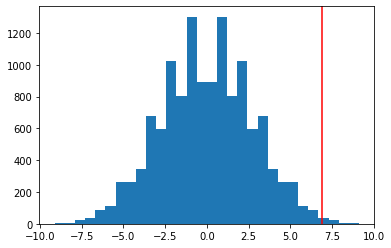

(6.875, array([ 6.875,  4.875,  4.375, ..., -4.375, -4.875, -6.875]))

In [37]:
from itertools import combinations

import numpy as np
from matplotlib import pyplot as plt

def test_sharp_null_hypothesis(data, 
        key = 'Drink', 
        treatment = 'Diet Cola', 
        value = 'Calcium Excreted'
    ):
    categories = set(data[key])
    assert len(data) % 2 == 0 and len(categories) == 2

    # compute the observed SACE
    control = list(categories - set([treatment]))[0]
    SACE = data[data[key] == treatment][value].mean() - \
            data[data[key] == control][value].mean()
    total = data[value].sum()
    
    # compute all possible SACEs when varying the treatment group
    y1_sum = []
    for choice in (combinations(data[value], len(data) // 2)):
        y1_sum.append(sum(choice)) 

    # y0_sum = total - y1_sum
    saces = (2 * np.array(y1_sum) - total) / (len(data) // 2)

    # compute the p-value
    p_value = (saces >= SACE).mean()
    print('p-value =', p_value)

    # plot the distribution of SACEs
    plt.hist(saces, bins = 30)
    plt.axvline(SACE, color = 'red')
    plt.show()

    return (SACE, saces)

test_sharp_null_hypothesis(data)

## Neyman's Average Null Hypothesis

Rather assume identity on each individual, Neyman assumes no average effect:

$${\rm H_0}:\ \mathbb EY^1= \mathbb EY^0.$$

We can use the estimated SACE to test the hypothesis,

$$\widehat{\rm SACE} = \frac{1}{n_1}\sum_{A_i=1}Y_i -  \frac{1}{n_0}\sum_{A_i=0}Y_i.$$

Similarly, $\widehat{\rm SACE}$ is a random variable when randomizing the assignment of $A$. We need to derive the statistical properties (mean, variance, distribution) of $\widehat{\rm SACE}$.

### Mean

Suppose we use the complete randomization so that each subject $\omega_i$ has probability $\frac{n_1}{N}$ to receive $A = 1$ and probability $\frac{n_0}{N}$ otherwise. Thus, $\mathbb I_{A_i=1}\sim B(1,\frac{n_1}{N})$ for each $i$.

Then it is clear that the estimator of SACE is unbiased:

$$\mathbb E\widehat{\rm SACE} =\mathbb E\left\{ \sum_i\left[ \frac{1}{n_1}Y_i^1\mathbb I_{A_i=1}-\frac{1}{n_0}Y_i^0\mathbb I_{A_i=0} \right]\right\}=\frac{1}{N}\sum_i (Y_i^1 - Y_i^0)={\rm SACE}.$$

### Variance
<!-- 
Define $X_i =\frac{1}{n_1} Y_i^1\mathbb I_{A_i=1}-\frac{1}{n_0}Y_i^0\mathbb I_{A_i=0}$. Then we have $\mathbb E(X_i) = \frac{1}{N}(Y_i^1-Y_i^0)$ and ${\rm Var}(X_i) = \frac{1}{n_1N}(Y_i^1)^2+\frac{1}{n_0N}(Y_i^0)^2-\frac{1}{N^2} (Y_i^1-Y_i^0)^2$. Also, we have 

$$\mathbb E(\mathbb I_{A_i=1}\mathbb I_{A_j=1}) = \frac{\binom{N-2}{n_1-2}}{\binom{N}{n_1}}=\frac{n_1(n_1-1)}{N(N-1)}
\ {\rm and}\  \mathbb E(\mathbb I_{A_i=0}\mathbb I_{A_j=0}) =\frac{n_0(n_0-1)}{N(N-1)}
\ {\rm and}\   \mathbb E(\mathbb I_{A_i=1}\mathbb I_{A_j=0})=\frac{n_0n_1}{N(N-1)}.$$

Hence the covariance is computed by 

$$\begin{aligned}{\rm Cov}(X_i,X_j) &=  \mathbb E(X_iX_j) - \mathbb E(X_i)\mathbb E(X_j) 
\\ & = \mathbb E\left\{\left(\frac{1}{n_1} Y_i^1\mathbb I_{A_i=1}-\frac{1}{n_0}Y_i^0\mathbb I_{A_i=0}\right)\left(\frac{1}{n_1} Y_j^1\mathbb I_{A_j=1}-\frac{1}{n_0}Y_j^0\mathbb I_{A_j=0}\right)\right\}  - \frac{1}{N^2}(Y_i^1-Y_i^0)(Y_j^1-Y_j^0)
\\ &=
\frac{1}{N(N-1)}\left(\frac{n_1-1}{n_1}Y_i^1Y_j^1 + \frac{n_0-1}{n_0}Y_i^0Y_j^0-Y_i^1Y_j^0 - Y_i^0Y_j^1\right)- \frac{1}{N^2}(Y_i^1-Y_i^0)(Y_j^1-Y_j^0)
\\ &= -\frac{1}{N(N-1)}\left(\frac{1}{n_1}Y_i^1Y_j^1 +\frac{1}{n_0}Y_i^0Y_j^0\right) + \frac{1}{N^2(N-1)}(Y_i^1-Y_i^0)(Y_j^1-Y_j^0)
 \quad\quad (i\neq j).\end{aligned}$$

Finally, the total variance of the estimator of SACE is given by

$$\begin{aligned}{\rm Var}(\widehat{\rm SACE}) &={\rm Var}\left\{ \sum_i\left( \frac{1}{n_1}Y_i^1\mathbb I_{A_i=1}-\frac{1}{n_0}Y_i^0\mathbb I_{A_i=0}\right)\right\}={\rm Var}\left\{\sum_i X_i\right\}\\ &=\sum_i{\rm Var}X_i + \sum_{i\neq j}{\rm Cov}(X_i,X_j)
\\ &=\sum_i\left[\frac{1}{n_1N}(Y_i^1)^2+\frac{1}{n_0N}(Y_i^0)^2-\frac{1}{N^2} (Y_i^1-Y_i^0)^2\right]
\\ &\quad\quad + \sum_{i\neq j}\left[-\frac{1}{N(N-1)}\left(\frac{1}{n_1}Y_i^1Y_j^1 +\frac{1}{n_0}Y_i^0Y_j^0\right)+ \frac{1}{N^2(N-1)}(Y_i^1-Y_i^0)(Y_j^1-Y_j^0)\right] 
\\ &= \frac{n_0}{n_1N^2}\sum_i (Y_i^1)^2+\frac{n_1}{n_0N^2}\sum_i (Y_i^0)^2+\frac{2}{N^2}\sum_i Y_i^1Y_i^0
\\ &\quad\quad +\frac{1}{N(N-1)}\left[\frac{1}{n_1}\sum_i (Y_i^1)^2+\frac{1}{n_0}\sum_i (Y_i^0)^2-\frac{1}{n_1}\left(\sum_i Y_i^1\right)^2+\frac{1}{n_0}\left(\sum_i Y_i^0\right)^2\right]
\\ &\quad\quad + \frac{1}{N^2(N-1)}\left(\sum_i  (Y_i^1 - Y_i^0)\right) ^2- \frac{1}{N^2(N-1)} \sum_i  (Y_i^1 - Y_i^0)^2
\end{aligned}$$ -->

The variance of the estimator of SACE is given by

$${\rm Var}(\widehat{\rm SACE}) = \frac{S_1^2}{n_1}+\frac{S_0^2}{n_0} - \frac{S_{10}^2}{N}$$

where $S_1^2 = \frac{1}{N-1}\sum_i (Y_i^1 - \bar Y^1)^2$, $S_0 ^2 =  \frac{1}{N-1}\sum_i (Y_i^0 - \bar Y^0)^2$ and $S_{10}^2 = \frac{1}{N-1}\sum_i [(Y_i^1 - Y_i^0) - (\bar Y^1 -\bar Y^0)]^2$.

<br> 

Yet not all $Y_i^1$ and $Y_i^0$ can be observed. We need an estimator for the variance given below:

$$\widehat{\rm Var}(\widehat{\rm SACE}) =\frac{1}{n_1-1}\sum_{A_i=1}(Y_i^1 - \bar Y^1)^2+\frac{1}{n_0-1}\sum_{A_i=0}(Y_i^0 - \bar Y^0)^2.$$

### Asymptotical Normality

We can assume SACE follows asymptotical normal distribution. When assuming the average null hypothesis holds, we can assume that the distribution is zero-mean.

In [10]:
import numpy as np
from scipy.stats import norm

def test_average_null_hypothesis(data, 
        key = 'Drink', 
        treatment = 'Diet Cola', 
        value = 'Calcium Excreted'
    ):
    categories = set(data[key])
    assert len(data) % 2 == 0 and len(categories) == 2

    control = list(categories - set([treatment]))[0]

    SACE = data[data[key] == treatment][value].mean() - \
            data[data[key] == control][value].mean()

    var = data[data[key] == treatment][value].var(ddof = 1) + \
            data[data[key] == control][value].var(ddof = 1)

    # compute the one-side p-value
    p_value = 1 - norm.cdf(SACE / np.sqrt(var))
    # p_value = 2 * (1 - norm.cdf(abs(SACE) / np.sqrt(var)))
    print('p-value =', p_value)

    # compute the confidence interval
    z = norm.ppf(0.975)
    lower = SACE - z * np.sqrt(var)
    upper = SACE + z * np.sqrt(var)
    print('95% confidence interval =', (lower, upper))

    return (SACE, var)

test_average_null_hypothesis(data)

p-value = 0.13095636260570687
95% confidence interval = (-5.135849187832333, 18.885849187832335)


(6.875, 37.55357142857143)